In [2]:
from proxy.base import prepare_train_and_test_sets, get_proxy_v1, get_proxy_v2
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize' : (20,10)}, style='whitegrid')

y, y_pred1,y_pred2=[], [], []

train_df, test_set=prepare_train_and_test_sets('files/smspecs_yearly.xlsx')
base_df=train_df.loc[train_df.type==0]

test_set_keys=[k for k in test_set if k[3:]!='-xxxx'*3]
y_base=base_df.loc[base_df.type==0].yearly.to_numpy()

for i, key in enumerate(test_set_keys):
    if len(test_set[key])>0:
        params=key.replace('xxxx', '0').split('-')
        vars = {'status': [int(x) for x in params[0]], 'year': [int(x) for x in params[1:]]}
        proxy1=get_proxy_v1(vars, train_df)
        proxy2=get_proxy_v2(vars, train_df, test_set)
        if len(proxy1)==len(test_set[key]):
            y=y+test_set[key].yearly.to_list()
            y_pred1=y_pred1+proxy1.y.to_list()
            y_pred2=y_pred2+proxy2.y.to_list()
            g = test_set[key].yearly-base_df.yearly
            ind = g.loc[g!=0].index.tolist()

print(f'proxy_v1: {mean_absolute_percentage_error(y, y_pred1)}')
print(f'proxy_v2: {mean_absolute_percentage_error(y, y_pred2)}')

proxy_v1: 0.01908538041811479
proxy_v2: 0.020050403711913918


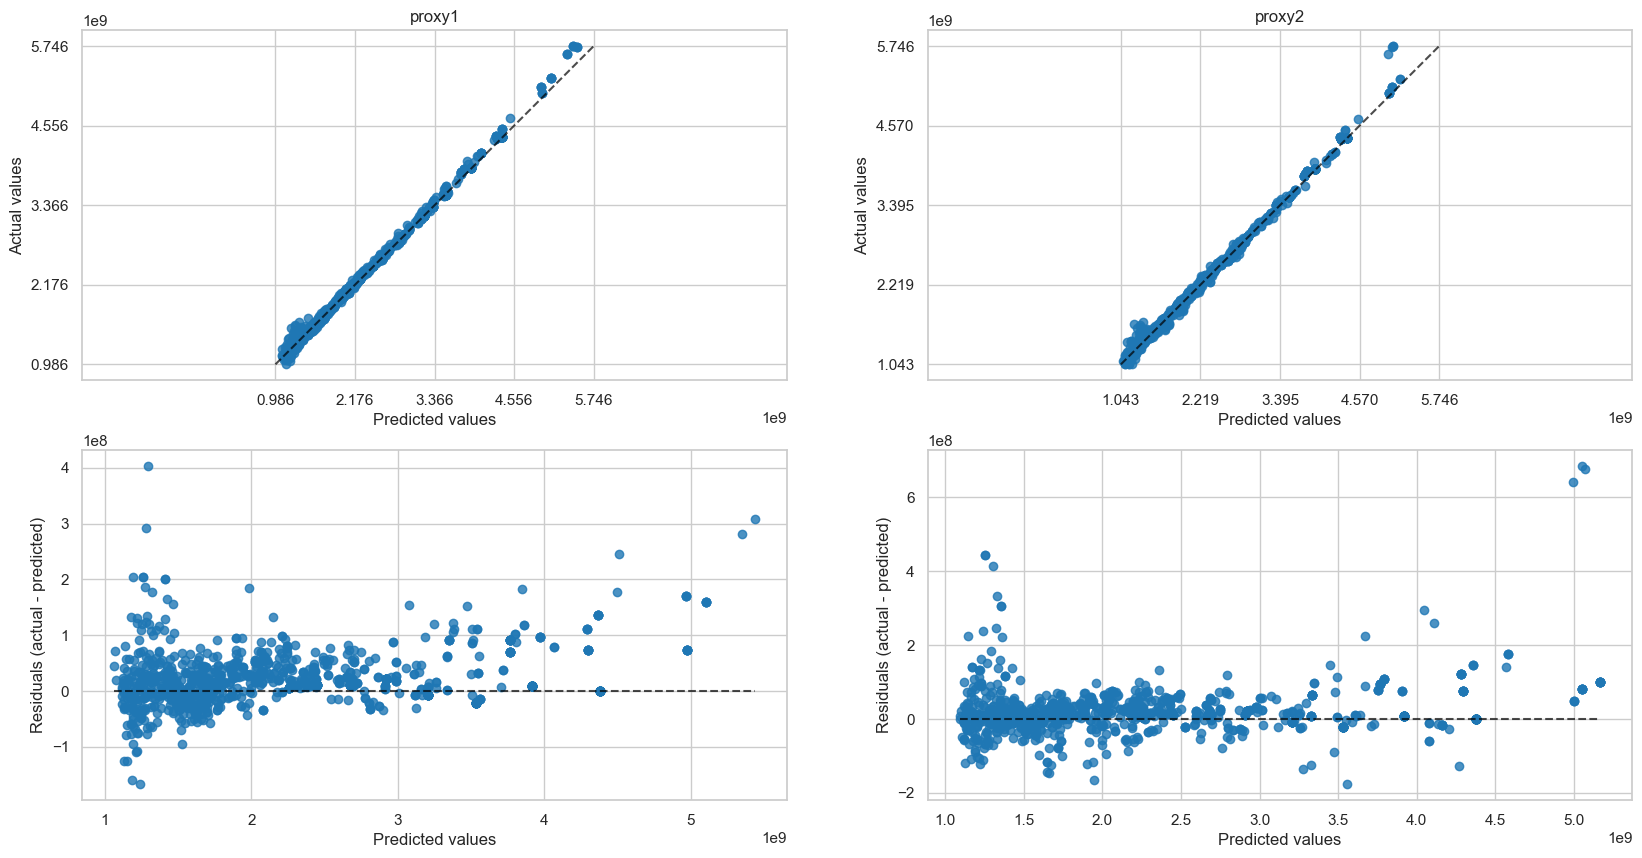

In [3]:
import numpy as np
from sklearn.metrics import PredictionErrorDisplay

y=np.array(y) # значения из ГДМ модели
y_pred1=np.array(y_pred1) #proxy-модель 1
y_pred2=np.array(y_pred2) #proxy-модель 2

fig, axs = plt.subplots(ncols=2, nrows=2)
PredictionErrorDisplay.from_predictions(y, y_pred1, kind="actual_vs_predicted", ax=axs[0][0])
PredictionErrorDisplay.from_predictions(y, y_pred1, kind="residual_vs_predicted", ax=axs[1][0])
PredictionErrorDisplay.from_predictions(y, y_pred2, kind="actual_vs_predicted", ax=axs[0][1])
PredictionErrorDisplay.from_predictions(y, y_pred2, kind="residual_vs_predicted", ax=axs[1][1])

axs[0][0].set_title('proxy1')
axs[0][1].set_title('proxy2')

plt.show()


,0
count,5.940000e+03
mean,1.942625e+07
std,6.875193e+07
min,-1.919233e+08
25%,-7.983326e+06
50%,1.019019e+07
75%,3.844040e+07
max,1.096095e+09


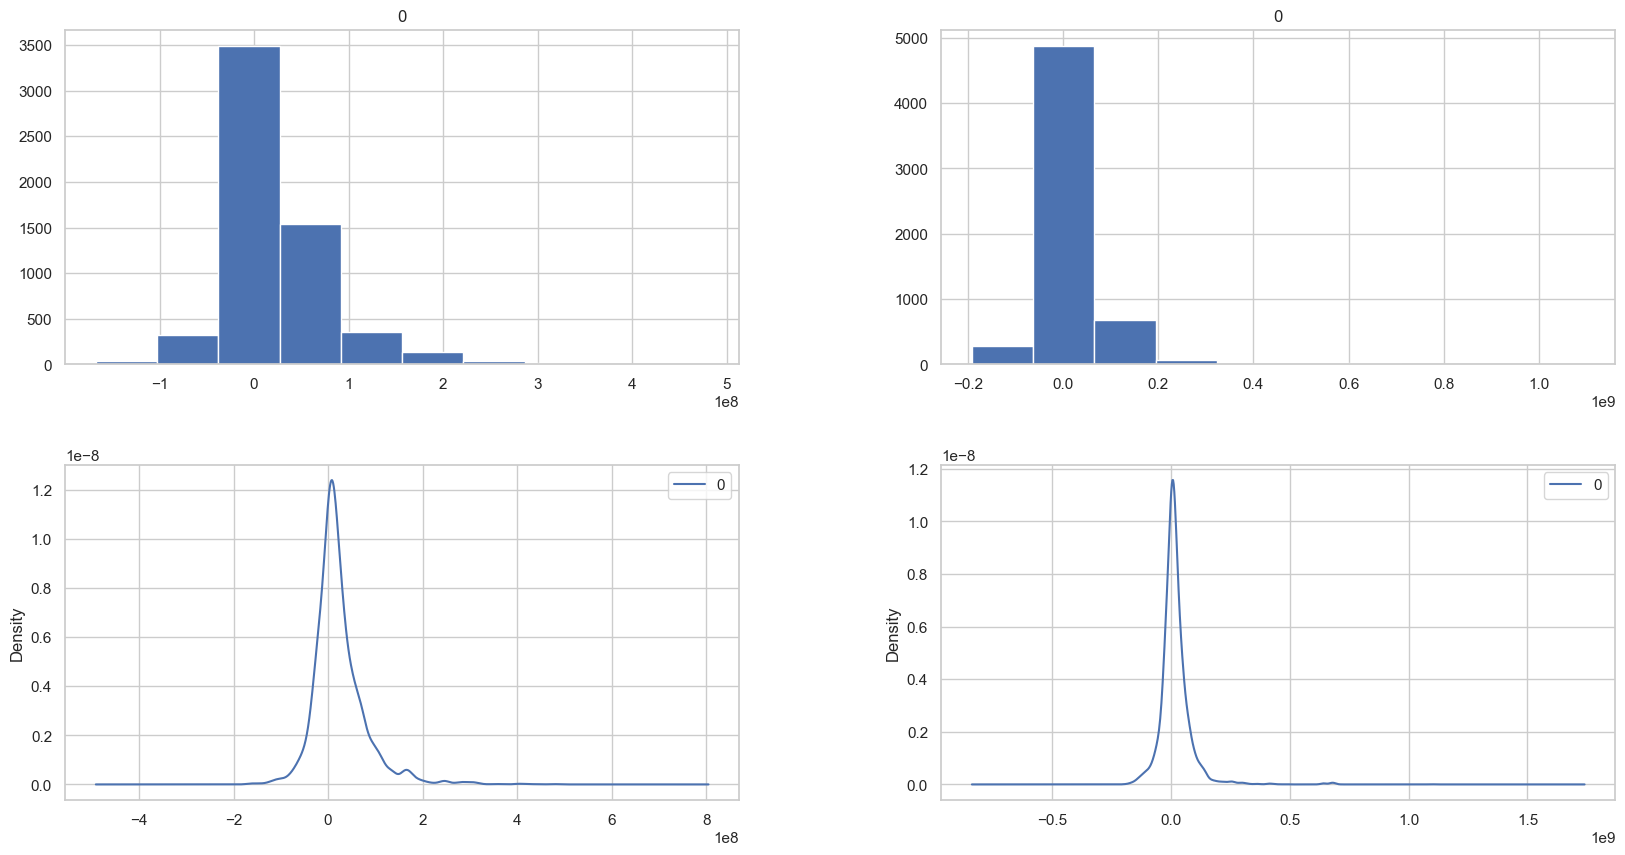

In [4]:
import pandas as pd
residuals1 = pd.DataFrame(y-y_pred1)
residuals2 = pd.DataFrame(y-y_pred2)
fig, axs = plt.subplots(ncols=2, nrows=2)
residuals1.hist(ax=axs[0][0])
residuals1.plot(kind='kde', ax=axs[1][0])

residuals2.hist(ax=axs[0][1])
residuals2.plot(kind='kde', ax=axs[1][1])

residuals2.describe()

0.00965780423243101
0.008319069848295993


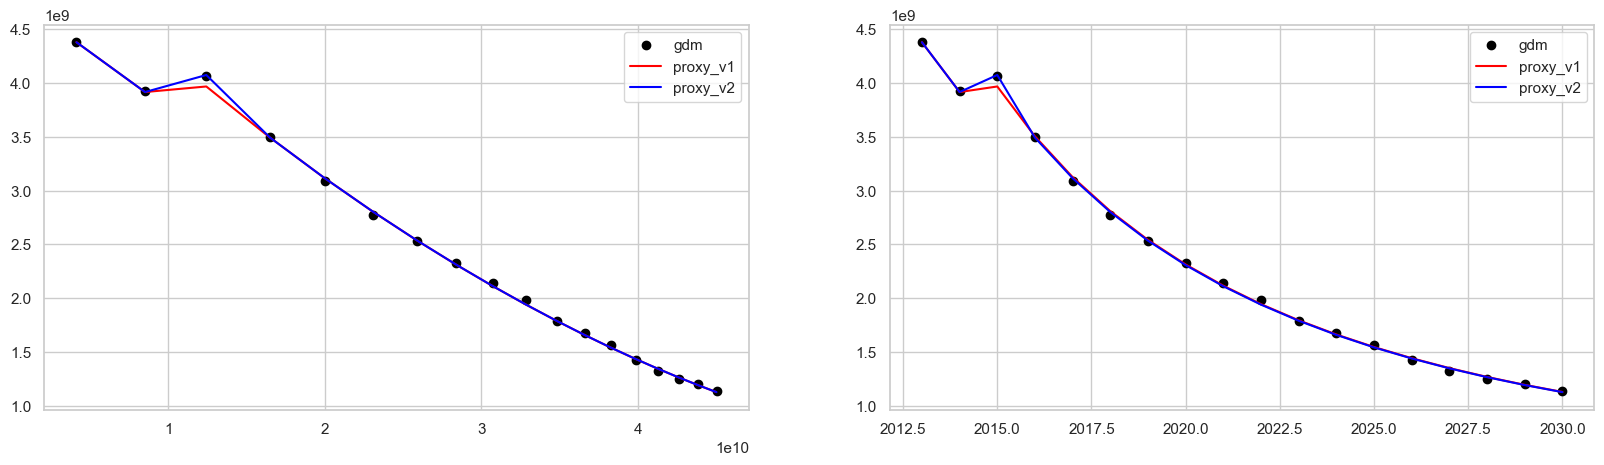

In [24]:
key='001-xxxx-xxxx-2015' 

params=key.replace('xxxx', '0').split('-')
vars = {'status': [int(x) for x in params[0]], 'year': [int(x) for x in params[1:]]}
proxy1=get_proxy_v1(vars, train_df)
proxy2=get_proxy_v2(vars, train_df, test_set)


fig, ax = plt.subplots(ncols=2, figsize=(20, 5))
ax[0].scatter(test_set[key].total, test_set[key].yearly, color='black', label='gdm')
ax[0].plot(proxy1.x, proxy1.y, label='proxy_v1', color='red')
ax[0].plot(proxy2.x, proxy2.y, label='proxy_v2', color='blue')
ax[0].legend()
ax[1].scatter(test_set[key].index.year.to_list(), test_set[key].yearly, color='black', label='gdm')
ax[1].plot(proxy1.year, proxy1.y, label=f'proxy_v1', color='red')
ax[1].plot(proxy2.year, proxy2.y, label='proxy_v2', color='blue')
ax[1].legend()

print(mean_absolute_percentage_error(test_set[key].yearly, proxy1.y))
print(mean_absolute_percentage_error(test_set[key].yearly, proxy2.y))

plt.show()